In [77]:
import matplotlib.pyplot as plt
import numpy as np
import openpyxl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as gb
import plotly.express as ex
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn .neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import xlrd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Carica il dataset
filepath = '/content/sample_data/Emissioni 10.000 ab.xls'
df = pd.read_excel(filepath)

df1 = df.copy()

df1.head()

In [ ]:
#estrae header e dati
header = df1.iloc[1]
data_df = df1[3:63]
data_df.columns = header

data_df.reset_index(drop=True, inplace = True)
data_df.head()

In [ ]:
data_df.describe()

In [ ]:
data_df.dropna(inplace=True)
data_df.isna().sum()

In [ ]:
data_df.dtypes

In [ ]:
parametri = ['Consumo specifico', 'SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10', 'PTS']

# Converti le colonne numeriche da tipo "object" a tipo numerico
data_df[parametri] = data_df[parametri].apply(pd.to_numeric, errors='coerce')

# Rimuovi le righe con valori mancanti (NaN)
data_df.dropna(inplace=True)

# Verifica il tipo di dati dopo la conversione
data_df.dtypes

In [ ]:
data_df.shape

In [ ]:
data_df.head()

In [ ]:
data_df.describe()

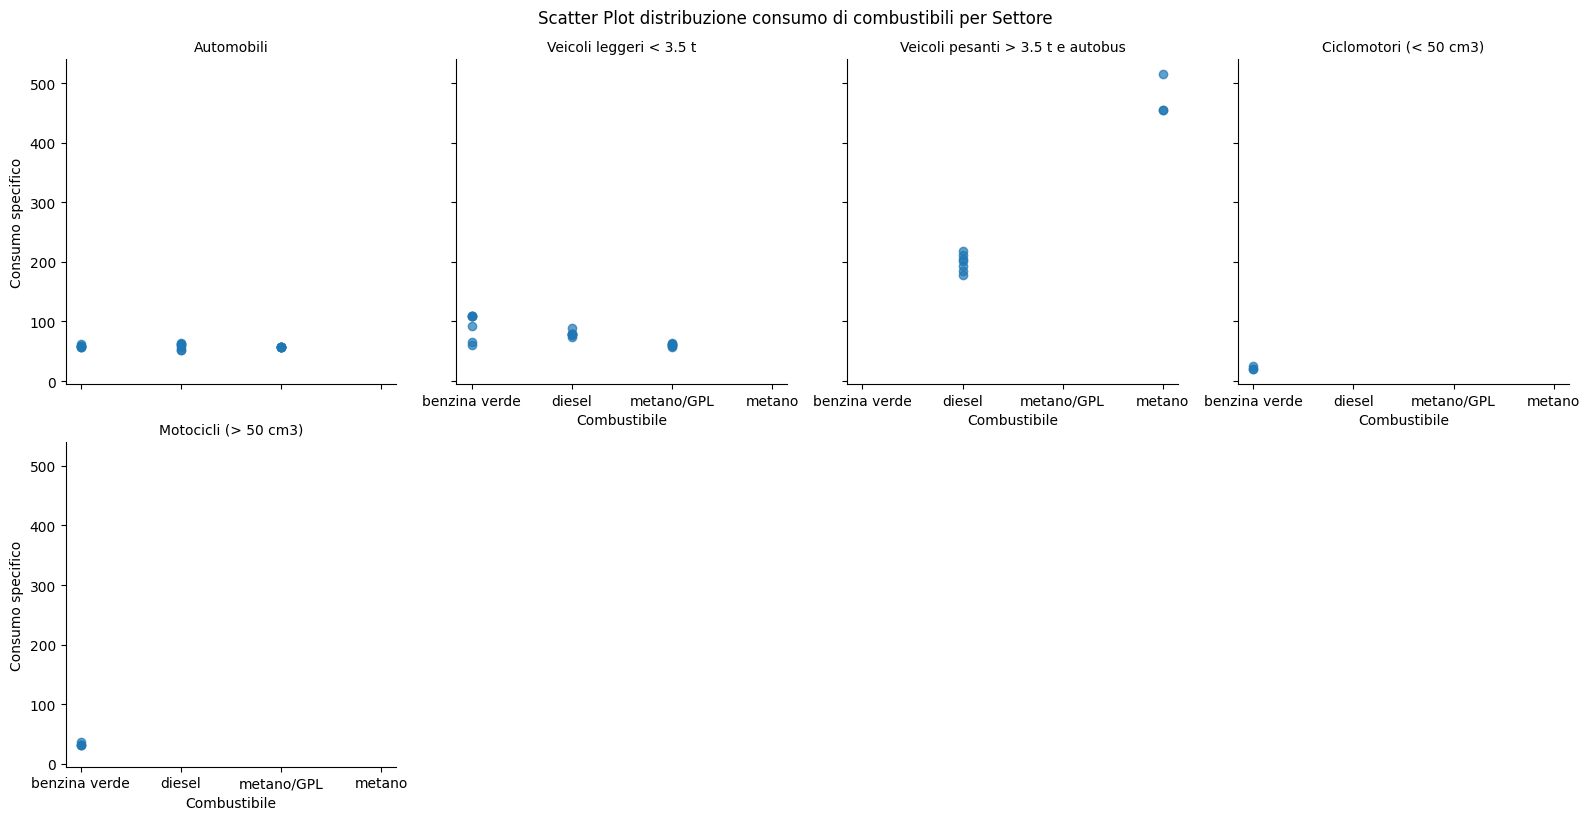

In [82]:
# Impostare la griglia di facce
g = sns.FacetGrid(data_df, col="Settore", col_wrap=4, height=4)

# Mappare uno scatter plot su ogni faccia
g.map(plt.scatter, "Combustibile", "Consumo specifico", alpha=0.7)

# Aggiungere il titolo alla griglia
g.set_titles(col_template="{col_name}")
g.fig.suptitle("Scatter Plot distribuzione consumo di combustibili per Settore", y=1.02)

# Mostrare i grafici
plt.show()

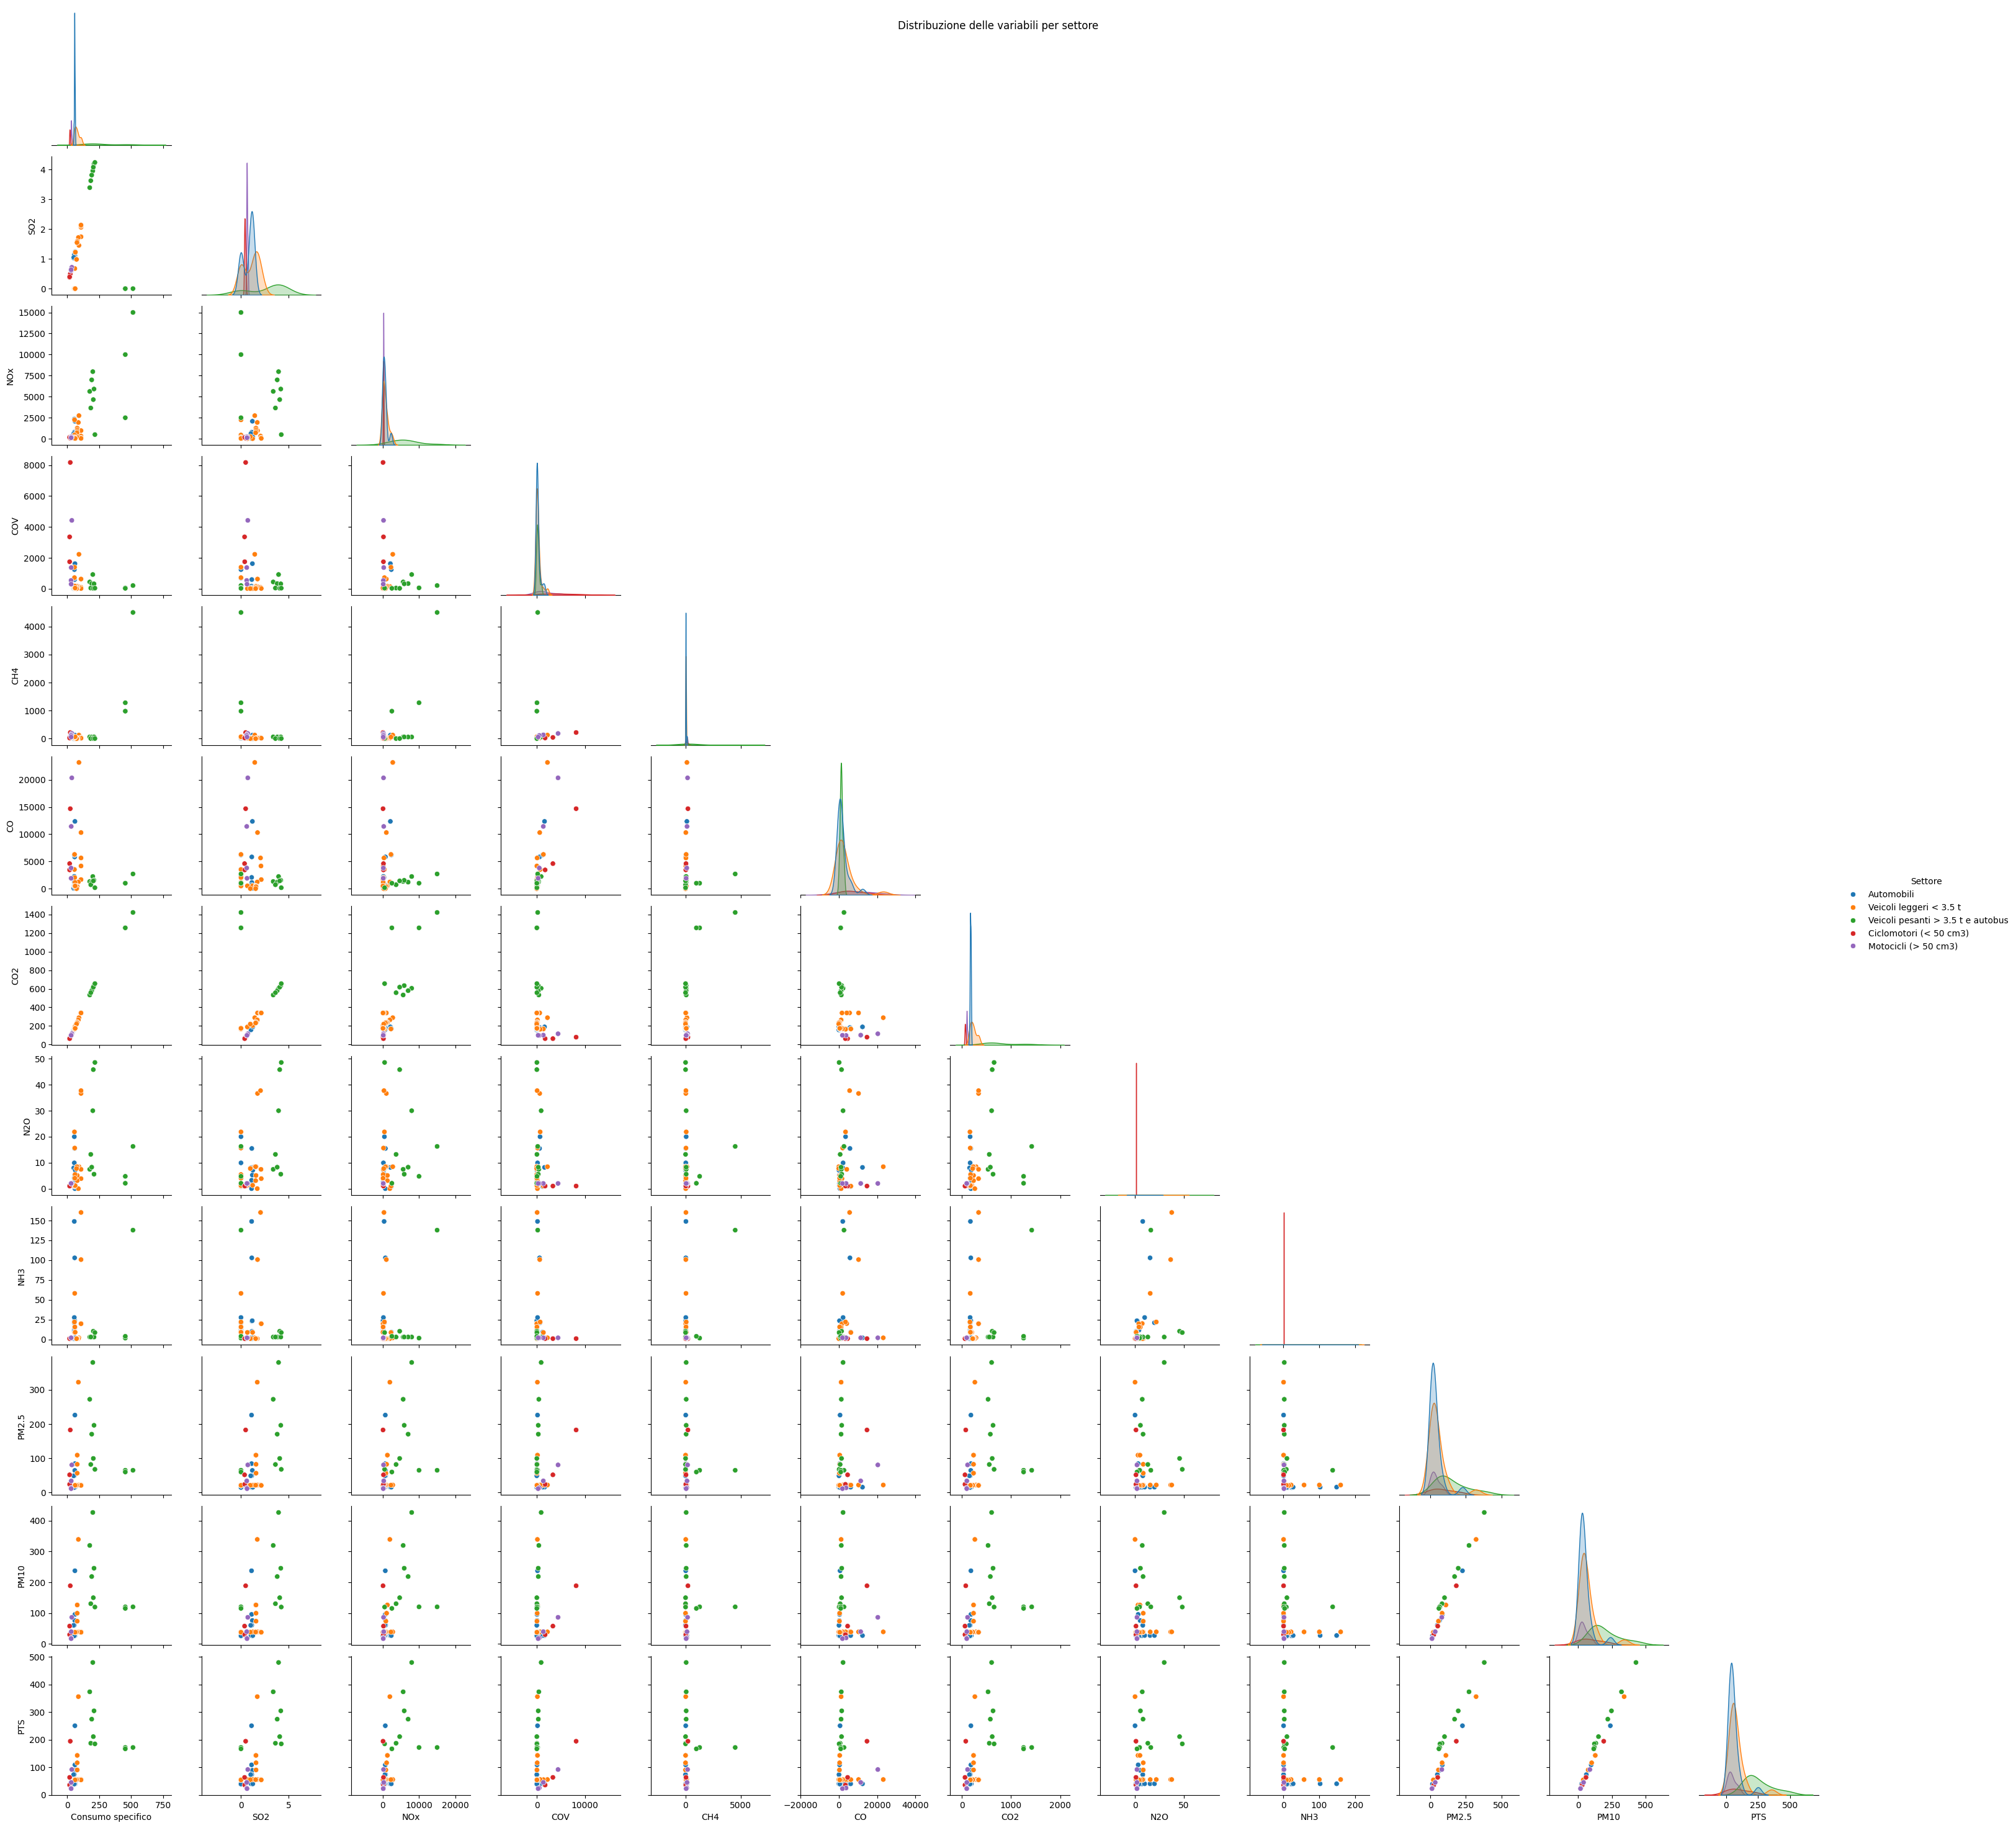

In [84]:
sns.pairplot(data_df, hue="Settore", height=2.5, corner=True, aspect=1)
plt.suptitle("Distribuzione delle variabili per settore")
plt.show()

<ipython-input-72-e0e1e6a4c557>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_df.corr()


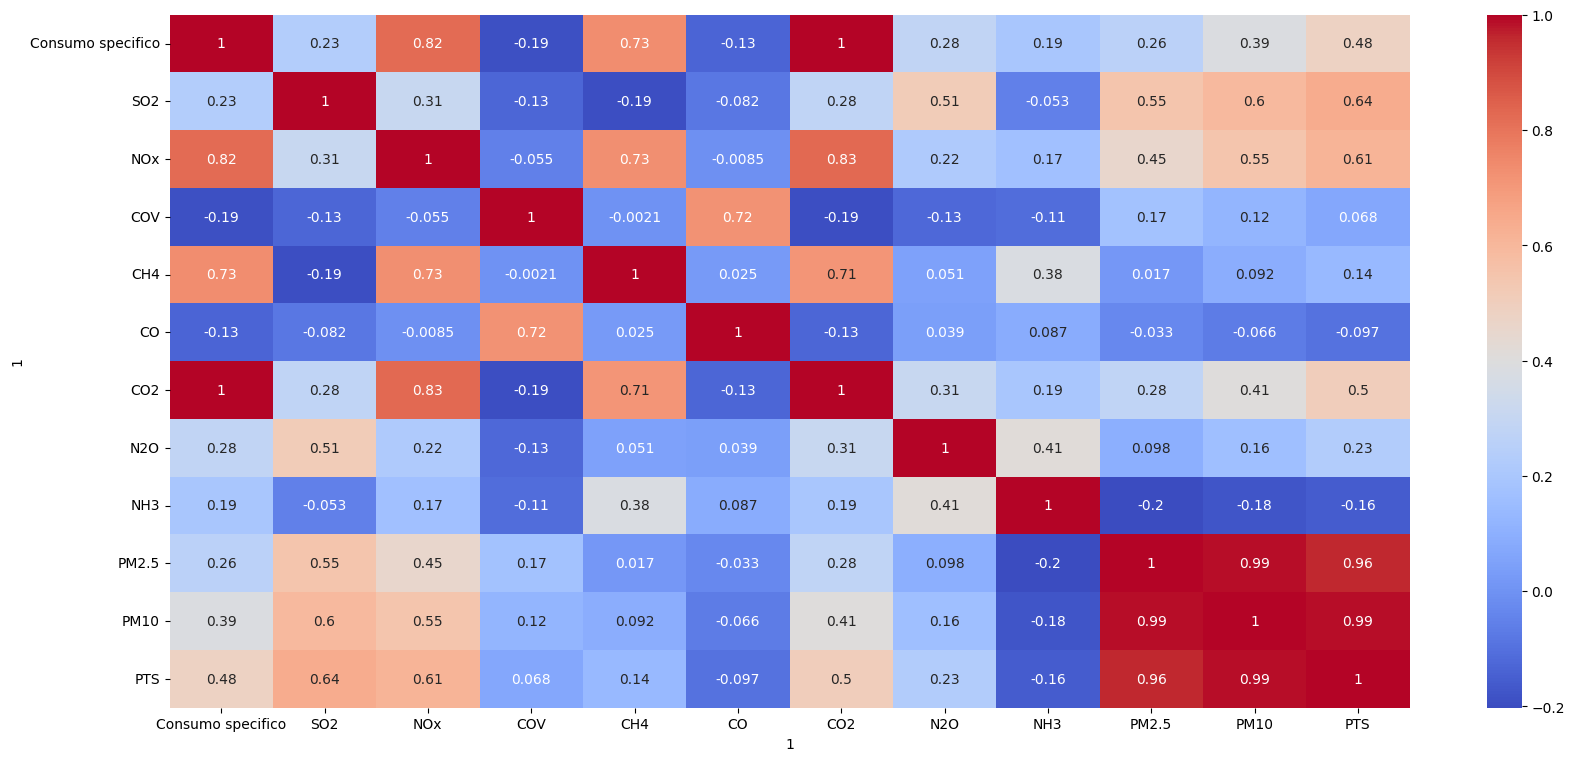

In [72]:
correlation_matrix = data_df.corr()
plt.figure(figsize=(20, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.show()

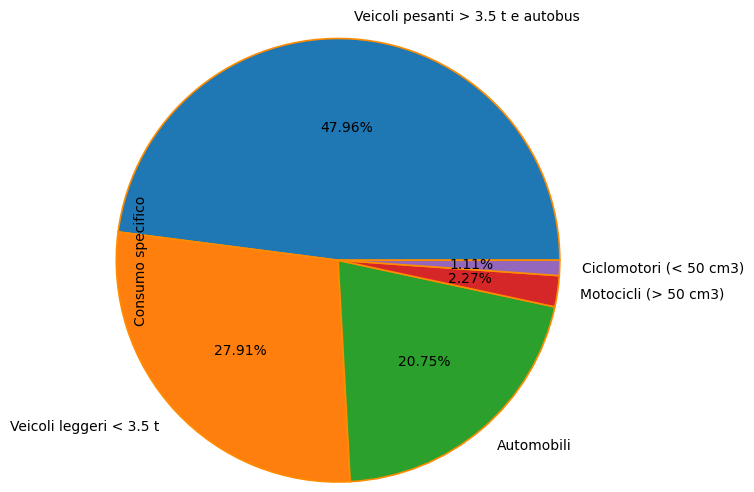

<Figure size 400x400 with 0 Axes>

In [74]:
df2 = data_df.copy()

df2.groupby(by = df2["Settore"])["Consumo specifico"].sum().sort_values(
ascending=False)[:5].plot(kind="pie",
                                  autopct="%1.2f%%",radius = 1.5,
                                  wedgeprops={'linewidth':1.2,
                                             'edgecolor':'darkorange'})
plt.figure(figsize=(4, 4))
plt.show()

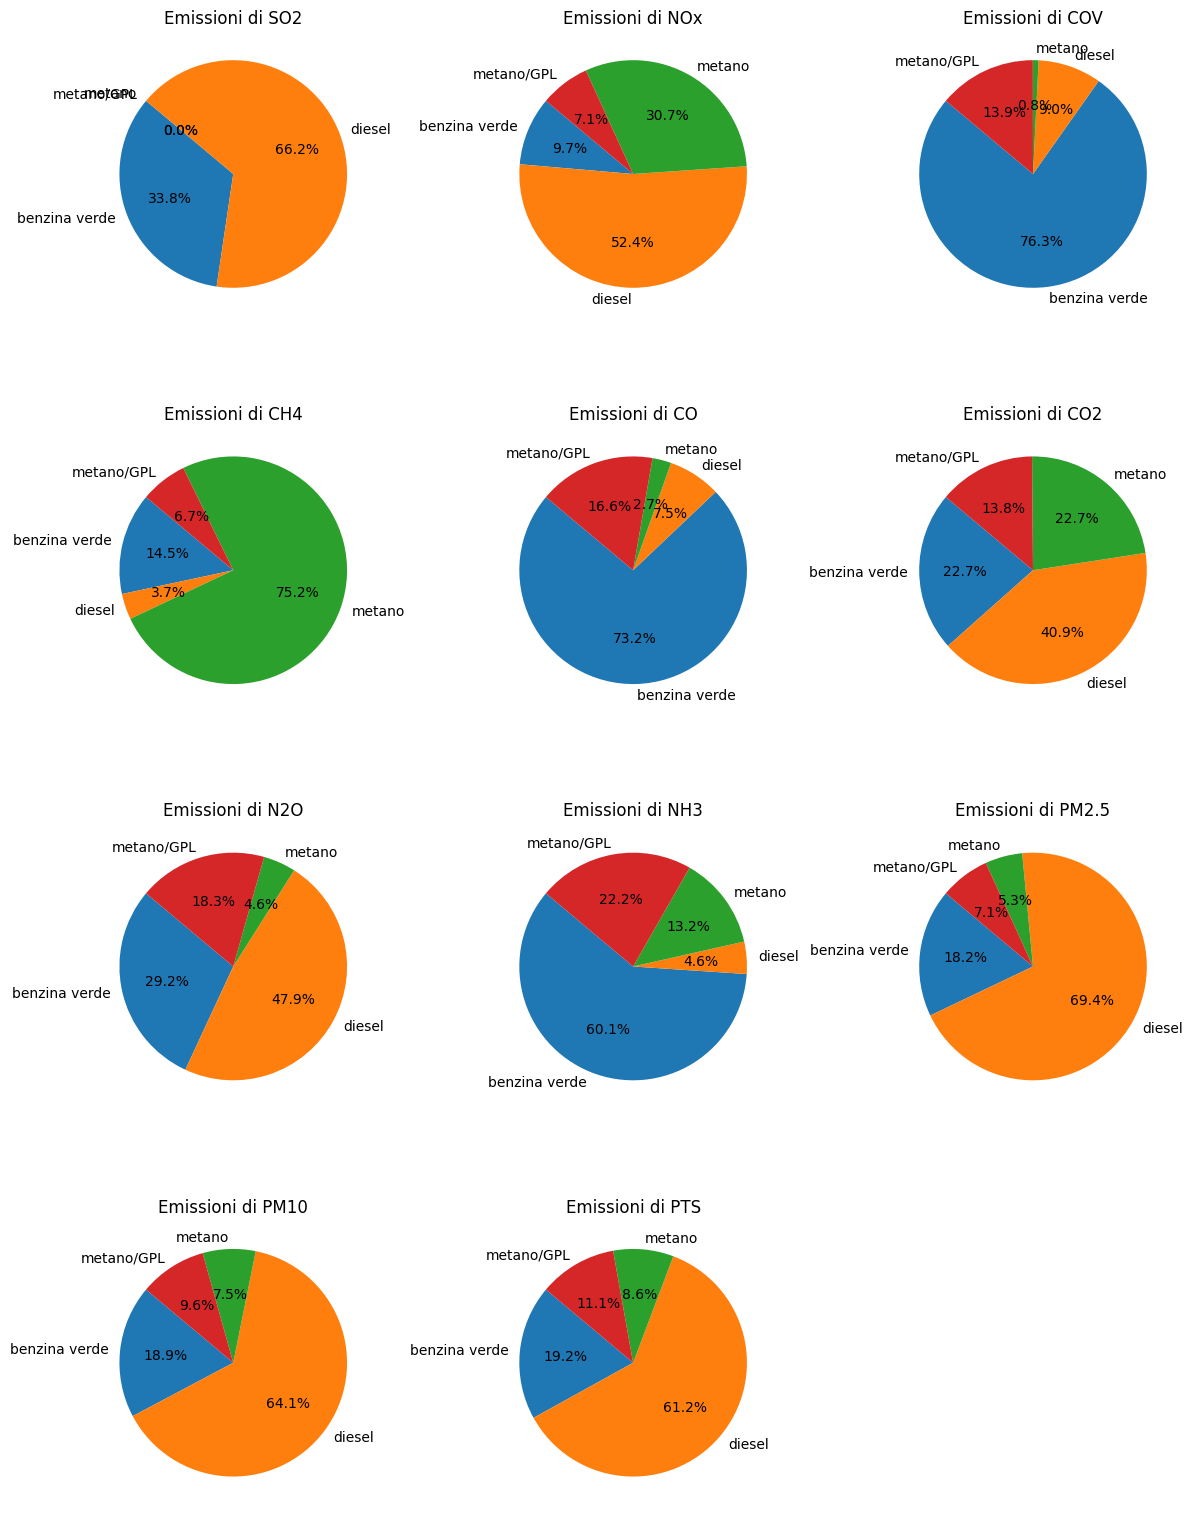

In [78]:
# Elenca tutti gli inquinanti
inquinanti = ['SO2', 'NOx', 'COV', 'CH4', 'CO', 'CO2', 'N2O', 'NH3', 'PM2.5', 'PM10', 'PTS']

# Calcola il numero di righe e colonne per i subplot
n = len(inquinanti)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows, ncols, figsize=(ncols*4, nrows*4))

# Crea il grafico a torta per ogni inquinante
for ax, inquinante in zip(np.ravel(axs), inquinanti):
    # Calcola la somma totale dell'inquinante per ogni tipo di combustibile
    somme_combustibili = df2.groupby('Combustibile')[inquinante].sum()

    ax.pie(somme_combustibili, labels=somme_combustibili.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(f'Emissioni di {inquinante}')

# Rimuovi gli assi vuoti
for ax in np.ravel(axs)[len(inquinanti):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()